In [11]:
#Loading Libraries
install.packages("hablar")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
#Loading Libraries
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(hablar)


Attaching package: ‘hablar’


The following object is masked from ‘package:dplyr’:

    na_if




In [13]:
library(rJava)
library(readxl)
#library(xlsx)
library(unpivotr)
library(tidyverse)
library(tidyxl)

ERROR: Error in library(rJava): there is no package called ‘rJava’


In [6]:
"overseas-merchandise-trade-january-2019.xlsx" %>%  read_excel() %>%
 glimpse()

New names:
* `` -> ...2


Observations: 37
Variables: 2
$ `Overseas merchandise trade: January 2019` <chr> NA, "List of tables", "1...
$ ...2                                       <chr> NA, NA, "Overseas mercha...


In [5]:
new_data <- xlsx_cells("overseas-merchandise-trade-january-2019.xlsx") %>% filter(sheet == "Table 2")%>%  rectify()%>% head(56) %>% tail(40)

In [6]:
new_data_2 <- as_tibble(new_data)

In [7]:
names(new_data_2) <- c("Row_Number","Year","Month","head1","Exports","head2","Export_change_Value","Imports",
                       "head3","Import_Change_Value","head4","head5","head6","head7","head8","head9","head10",
                       "head11","head12","head13")
head(new_data_2)

Row_Number,Year,Month,head1,Exports,head2,Export_change_Value,Imports,head3,Import_Change_Value,head4,head5,head6,head7,head8,head9,head10,head11,head12,head13
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>
17,2016,Jan,NA,4370,NA,11.1,4343,NA,2.7,28,NA,4102,NA,0.2,4238,NA,-1.2,-136,NA
18,NA,Feb,NA,4179,NA,-4.4,4173,NA,-3.9,6,NA,4103,NA,0,4204,NA,-0.8,-101,NA
19,NA,Mar,NA,3624,NA,-13.3,4011,NA,-3.9,-387,NA,4096,NA,-0.2,4187,NA,-0.4,-91,NA
20,NA,Apr,NA,4097,NA,13,4285,NA,6.8,-188,NA,4082,NA,-0.3,4184,NA,-0.1,-102,NA
21,NA,May,NA,4185,NA,2.2,4242,NA,-1,-56,NA,4063,NA,-0.5,4197,NA,0.3,-134,NA
22,NA,Jun,NA,4089,NA,-2.3,4216,NA,-0.6,-128,NA,4042,NA,-0.5,4218,NA,0.5,-176,NA


In [8]:

data1 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number <29) %>%
mutate(Year=2016)

data2 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>29 & Row_Number<42) %>%
mutate(Year=2017)

data3 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>42 & Row_Number<55) %>%
mutate(Year=2018)

data4 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number==56) %>%
mutate(Year=2019)

Export_Import_Data <- rbind(data1,data2,data3,data4) %>%
select(Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value)

In [9]:
Export_Import_Data_tidy <- transform(Export_Import_Data, 
         Year = round(as.numeric(Year),0) ,                         
         Exports = round(as.numeric(Exports),2),
         Export_change_Value = round(as.numeric(Export_change_Value),2),
         Imports = round(as.numeric(Imports),2),
         Import_Change_Value = round(as.numeric(Import_Change_Value),2))

Export_Import_Data_2018 <-Export_Import_Data_tidy %>%
filter(Year==2018)

Export_Import_Data_2018

Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Jan,4540,-12.8,5129,1.9
2018,Feb,4586,1.0,4793,-6.6
2018,Mar,4467,-2.6,5167,7.8
2018,Apr,4714,5.5,5180,0.3
2018,May,4668,-1.0,4936,-4.7
2018,Jun,4772,2.2,5430,10.0
2018,Jul,5068,6.2,5447,0.3
2018,Aug,4767,-5.9,5268,-3.3
2018,Sep,5133,7.7,5764,9.4


In [14]:

url <- "https://www.climatestotravel.com/climate/new-zealand"  # this is the base url from where the scraping starts
seasonality <- read_html(url) %>%
              html_table(fill=TRUE) # Reading and parsing the html of given webpage

Month_Value <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

seasonality_details <- data.frame(seasonality[1]) %>%
                      t() %>% 
                      data.frame() %>%
                      slice(-1) %>%
                      mutate(Month=Month_Value)

names(seasonality_details) <- c("Min(°C)","Max(°C)","Min(°F)","Max(°F)","Month")

seasonality_details_tidy <- seasonality_details %>% 
                            select(Month,"Min(°C)","Max(°C)","Min(°F)","Max(°F)") %>%
                            retype() # To convert factor value to numeric,the problem is commas instead of dots,
                                     #it replaces them with dots -from Stackoverflow.com
                           

seasonality_details_tidy


Month,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<int>,<int>,<int>,<int>
Jan,16,24,61,75
Feb,17,24,63,75
Mar,15,23,59,73
Apr,13,20,55,68
May,11,17,52,63
Jun,8,15,46,59
Jul,8,14,46,57
Aug,8,15,46,59
Sep,10,16,50,61


In [15]:
Export_Import_Monthly <-merge(x = Export_Import_Data_2018, y = seasonality_details_tidy, by = "Month",sort = F)
Export_Import_Monthly

Month,Year,Exports,Export_change_Value,Imports,Import_Change_Value,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Jan,2018,4540,-12.8,5129,1.9,16,24,61,75
Feb,2018,4586,1.0,4793,-6.6,17,24,63,75
Mar,2018,4467,-2.6,5167,7.8,15,23,59,73
Apr,2018,4714,5.5,5180,0.3,13,20,55,68
May,2018,4668,-1.0,4936,-4.7,11,17,52,63
Jun,2018,4772,2.2,5430,10.0,8,15,46,59
Jul,2018,5068,6.2,5447,0.3,8,14,46,57
Aug,2018,4767,-5.9,5268,-3.3,8,15,46,59
Sep,2018,5133,7.7,5764,9.4,10,16,50,61


In [16]:
Months.name <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")


In [17]:
# Reference-https://www.datacamp.com/community/tutorials/facets-ggplot-r

scales_y <- list(
  "Exports" = scale_y_continuous(limits = c(0, 6000), breaks = seq(0, 2000, 6000)),
  "Imports" = scale_y_continuous(limits = c(0, 6000), breaks = seq(0, 2000, 6000)),
  "Max(°C)" = scale_y_continuous(limits = c(5, 30), breaks = seq(5, 10, 30))
)

variable_names <- list(
  "Exports" = "Exports in 2018" ,
  "Imports" = "Imports in 2018",
   "Max(°C)" = "Average Temperature of New Zealand"
)


variable_labeller <- function(variable,value){
  return(variable_names[value])
                    }



In [18]:
Export_Import_Temp_Monthly <- gather(Export_Import_Monthly, key="measure", value="value", c("Exports", "Imports","Max(°C)"))

Warning message:
“The labeller API has been updated. Labellers taking `variable`and `value` arguments are now deprecated. See labellers documentation.”


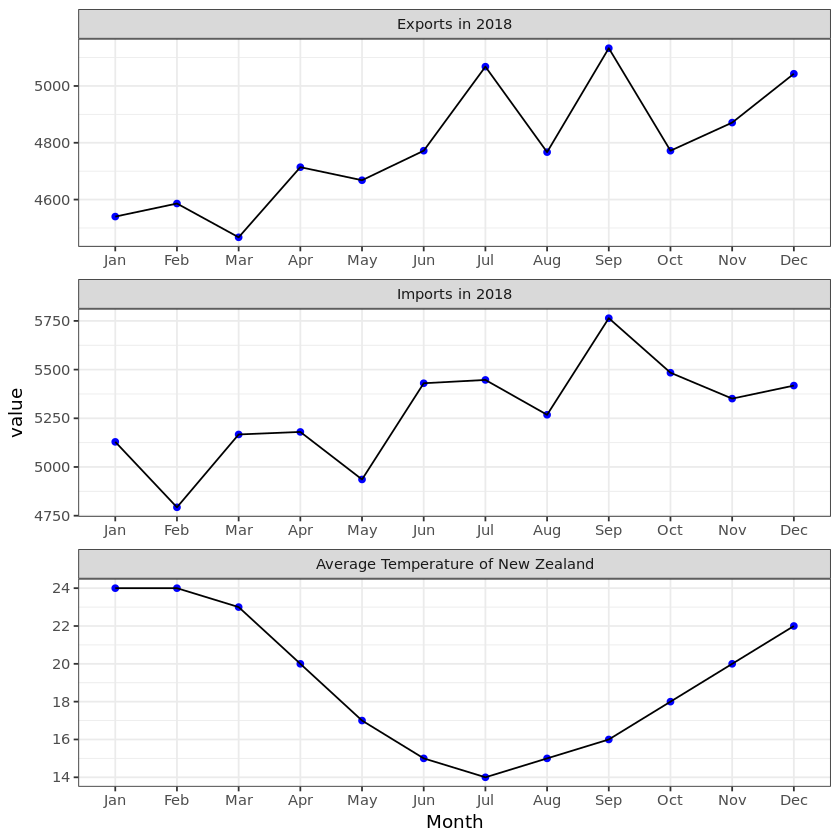

In [19]:
ggplot(data=Export_Import_Temp_Monthly, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 #geom_bar(stat='identity', fill="forest green")
 geom_point(color="blue")+
 geom_line()+ facet_wrap(~measure,ncol=1,labeller=variable_labeller,scales ="free") +
 labs(Title="Analayis of Export and Import based on Climate Conditions",x="Month")+
 theme_bw()

In [20]:
Export_Import_Monthly_Details <- gather(Export_Import_Monthly, key="measure", value="value", c("Exports", "Imports"))

Warning message:
“Ignoring unknown parameters: scales”


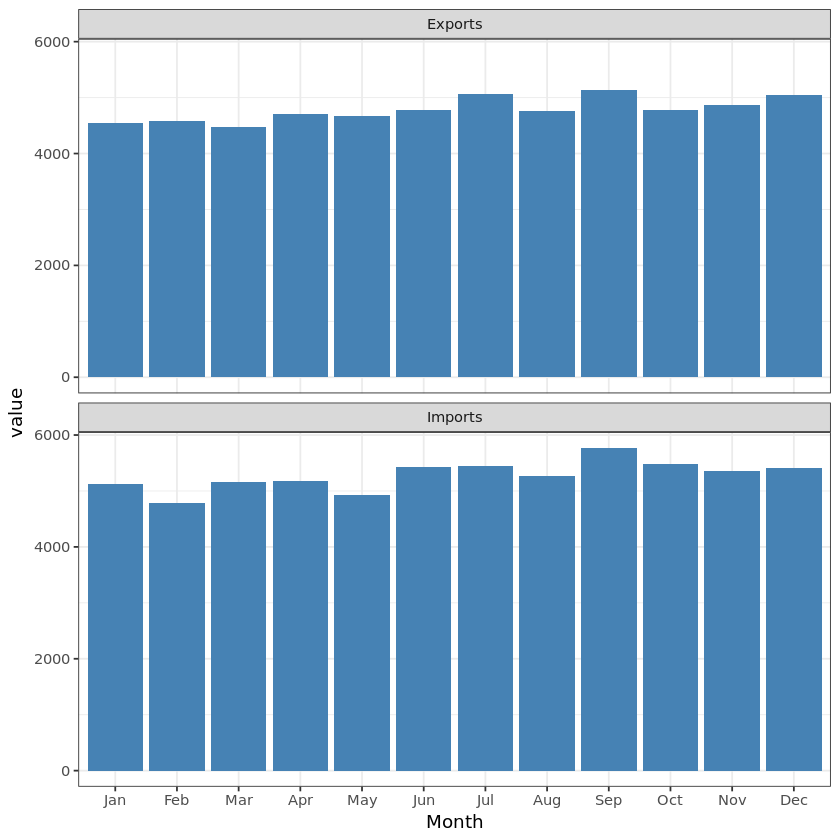

In [21]:
ggplot(data=Export_Import_Monthly_Details, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 geom_bar(stat='identity', fill="steelblue",scales="free") +
 facet_wrap(~measure,ncol=1) +
 labs(Title="Analayis of Export and Import based on Climate Conditions",x="Month")+
 theme_bw()